In [188]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import

In [189]:
train_df = pd.read_csv(r'C:\Users\A673431\Desktop\credit scoring\train_u6lujuX_CVtuZ9i.csv')
test_df = pd.read_csv(r'C:\Users\A673431\Desktop\credit scoring\test_Y3wMUE5_7gLdaTN.csv')

## Primary Analysis

In [190]:
combine = [train_df, test_df]
for dataset in combine:
    dataset.drop('Loan_Amount_Term', axis = 1)    

In [191]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [192]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [193]:
train_df.describe(include=['object', 'bool'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001112,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [194]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 no

In [195]:
train_df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [196]:
test_df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## Data wrangling

In [197]:
combine = [train_df,test_df]
for dataset in combine:
    dataset['Gender'] = dataset['Gender'].replace('Male',0)
    dataset['Gender'] = dataset['Gender'].replace('Female',1)
    dataset['Married'] = dataset['Married'].replace('Yes',1)
    dataset['Married'] = dataset['Married'].replace('No',0)
    dataset['Education'] = dataset['Education'].replace('Graduate', 1)
    dataset['Education'] = dataset['Education'].replace('Not Graduate',0)
    dataset['Self_Employed'] = dataset['Self_Employed'].replace('No', 0)
    dataset['Self_Employed'] = dataset['Self_Employed'].replace('Yes', 1)
    dataset['Property_Area'] = dataset['Property_Area'].map( {'Urban': 0, 'Semiurban': 1, 'Rural': 2} )
    dataset['Dependents'] = dataset['Dependents'].replace('3+', 4)

In [199]:
for dataset in combine:
    dataset['Self_Employed'] = dataset['Self_Employed'].fillna(pd.Series(np.random.choice([1,0], p = [0.14,0.86], size=len(dataset))))
    dataset['Gender'] = dataset['Gender'].fillna(pd.Series(np.random.choice([1,0], p = [0.186,0.814], size=len(dataset))))
    dataset['Credit_History'] = dataset['Credit_History'].fillna(pd.Series(np.random.choice([1,0], p = [0.842, 0.158], size=len(dataset))))
    dataset['Married'].fillna(0,inplace=True)
    dataset['Dependents'] = dataset['Dependents'].fillna(pd.Series(np.random.choice([0,1,2,4], p = [0.56,0.16,0.15,0.13], size=len(dataset))))

In [201]:
table = train_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Credit_History', aggfunc=np.median)
def fage(x):
    return table.loc[x['Self_Employed'],x['Credit_History']]
train_df['LoanAmount'].fillna(train_df[train_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [202]:
table1 = test_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Credit_History', aggfunc=np.median)
def fage(x):
    return table1.loc[x['Self_Employed'],x['Credit_History']]
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [203]:
train_df.apply(lambda x: sum(x.isnull()), axis = 0)

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Data visualisation

In [215]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())

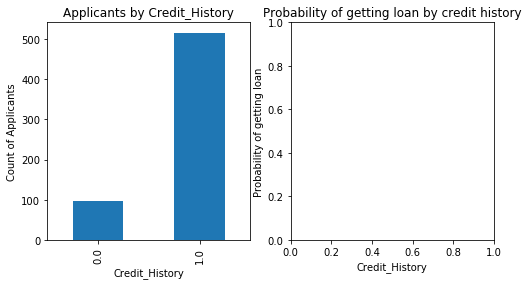

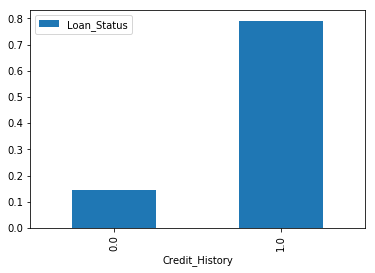

In [220]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

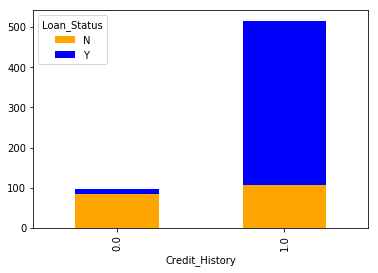

In [225]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['orange','blue'], grid=False)

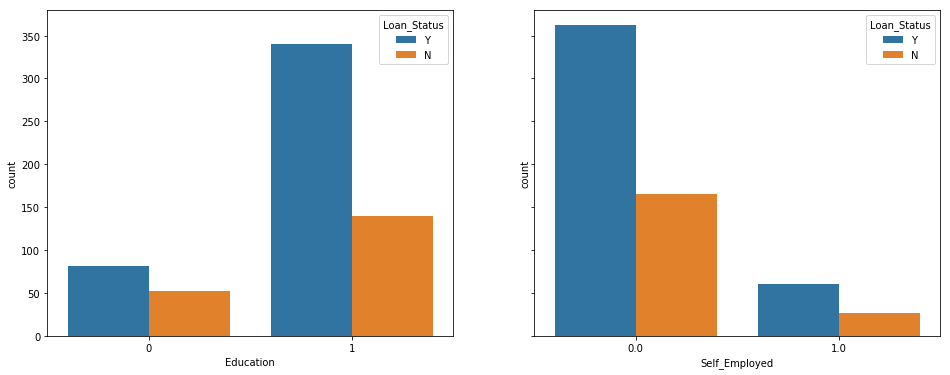

In [226]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(16,6))

sns.countplot(x='Education', hue='Loan_Status', data=train_df, ax=axes[0]);
sns.countplot(x='Self_Employed', hue='Loan_Status', data=train_df, ax=axes[1]);

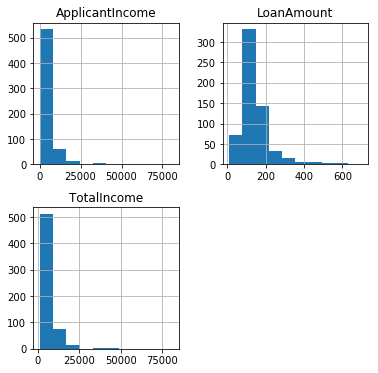

In [238]:
import warnings
warnings.filterwarnings("ignore")

train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
features = list(set(['TotalIncome','ApplicantIncome','LoanAmount']))
train_df[features].hist(figsize=(6,6));

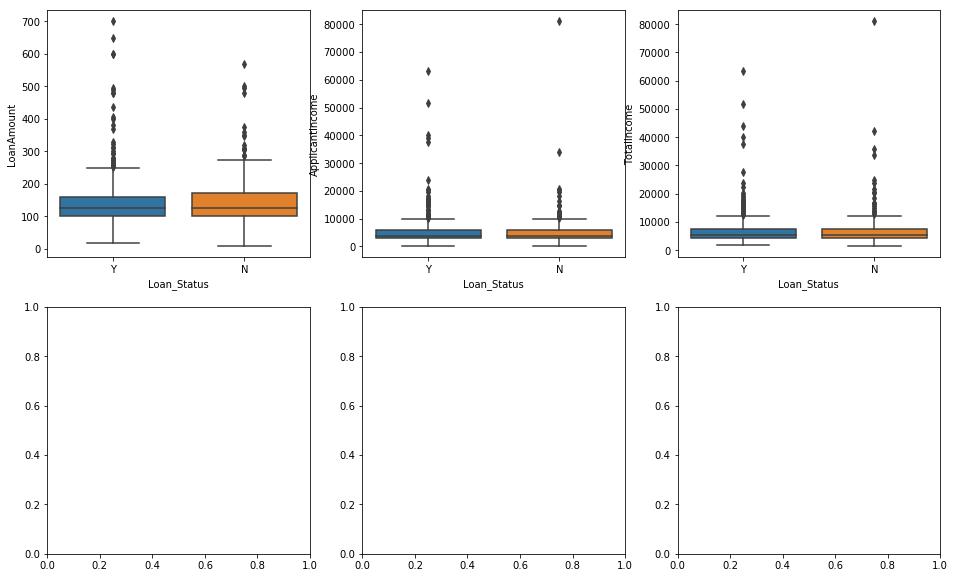

In [239]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))

for idx, feat in  enumerate(features):
    sns.boxplot(x='Loan_Status', y=feat, data=train_df, ax=axes[idx // 3, idx % 3])
    axes[idx // 3, idx % 3].legend()
    axes[idx // 3, idx % 3].set_xlabel('Loan_Status')
    axes[idx // 3, idx % 3].set_ylabel(feat);

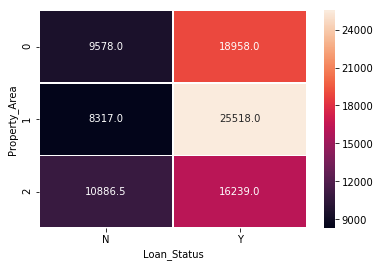

In [240]:
pivot = train_df.pivot_table(index='Property_Area',columns='Loan_Status',values='LoanAmount', 
                        aggfunc=sum ).fillna(0)
sns.heatmap(pivot, annot=True, fmt=".1f", linewidths=.5)

## Cross validation

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Education','Self_Employed','Loan_Status', 'Property_Area']
le = LabelEncoder()
for i in var_mod:
    train_df[i] = le.fit_transform(train_df[i])
train_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
TotalIncome          float64
dtype: object

In [246]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import KFold 
from sklearn import metrics
def classification_model(model, data, predictors, outcome):
    
    model.fit(data[predictors],data[outcome])
    
    predictions = model.predict(data[predictors])
    
    accuracy = metrics.accuracy_score(predictions, data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    
    kf = KFold(data.shape[0], n_folds = 5)
    error = []
    for train, test in kf:
        
        train_predictors = (data[predictors].iloc[train,:])
        
        train_target = data[outcome].iloc[train]
        
        model.fit(train_predictors, train_target)
        
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    model.fit(data[predictors],data[outcome])

### Logistic Regression

In [247]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train_df, predictor_var, outcome_var)

Accuracy : 80.130%
Cross-Validation Score : 80.133%


### Decision Tree

In [249]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train_df,predictor_var,outcome_var)

Accuracy : 80.130%
Cross-Validation Score : 80.133%


In [250]:
predictor_var = ['Credit_History','LoanAmount']
classification_model(model, train_df,predictor_var,outcome_var)

Accuracy : 86.971%
Cross-Validation Score : 69.536%


### Random Forest

In [255]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area',
        'TotalIncome']
classification_model(model, train_df,predictor_var,outcome_var)

Accuracy : 99.511%
Cross-Validation Score : 74.433%


## Testing on the testing set

In [269]:
X_train = train_df.drop(['Loan_Status','Loan_ID','Loan_Amount_Term','TotalIncome'], axis=1)
Y_train = train_df['Loan_Status']
X_test = test_df.drop(['Loan_ID','Loan_Amount_Term'], axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((614, 10), (614,), (367, 10))

### Logistic Regression

In [270]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.459999999999994

In [271]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
8,Loan_Amount_Term,2.770180
1,Married,0.397941
3,Education,0.182226
2,Dependents,0.004404
5,ApplicantIncome,0.000006
6,CoapplicantIncome,-0.000046
7,LoanAmount,-0.001667
4,Self_Employed,-0.049908
0,Gender,-0.146459
9,Credit_History,-0.181337


### k-Nearest Neighbors algorithm

In [274]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

78.340000000000003

### Gaussian Naive Bayes

In [276]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.480000000000004

### Stochastic Gradient Descent

In [278]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

67.430000000000007

### Decision Tree

In [283]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = (decision_tree.score(X_train, Y_train) * 100)
acc_decision_tree

100.0

In [288]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 'Stochastic Gradient Decent', 'Decision Tree'],
    'Score': [ acc_knn, acc_log, acc_gaussian, acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,100.00
1,Logistic Regression,80.46
2,Naive Bayes,79.48
0,KNN,78.34
3,Stochastic Gradient Decent,67.43
